In [1]:
from integrative_worklow import construct_topic_modeling_concept_hierarchy
import pandas as pd
from ontology_algorithm import draw_hierarchy_tree_from_ontology

In [2]:
df = pd.read_csv("../data/data_structures.csv").dropna()

# generate unique list of chapter titles 
chapter_titles = df["chapter-title"].unique()

# generate list of each chapters text and sentences per chapter 
chapter_texts = []
sentences_list = []
text = ''
for chapter in df["chapter"].unique():
    chapter_df = df.query(f'chapter == "{chapter}"')
    text = ''
    for chapter_text in chapter_df["text"].values:
        text += chapter_text + ' '
    chapter_texts.append(text)
    sentences_list.append(chapter_df["text"].values.tolist())

CLUSTER #1
Cluster Chapters: [8]
Key Features: ['hash', 'probe', 'slot', 'probe sequence', 'table', 'hashing', 'hash function', 'records', 'record', 'home']
CLUSTER #2
Cluster Chapters: [2, 6, 14]
Key Features: ['sort', 'comparisons', 'sorting', 'bound', 'lower', 'elements', 'lower bound', 'lower bounds', 'bounds', 'worst']
CLUSTER #3
Cluster Chapters: [0, 3]
Key Features: ['curr', 'design', 'stack', 'queue', 'linked', 'type', 'implementation', 'adt', 'node', 'link']
CLUSTER #4
Cluster Chapters: [1, 13]
Key Features: ['induction', 'summation', 'recurrence', 'log', 'proof', 'theorem', 'closed form', 'solution', 'mathematical', 'prove']
CLUSTER #5
Cluster Chapters: [7, 11]
Key Features: ['block', 'memory', 'buffer', 'file', 'disk', 'sector', 'blocks', 'matrix', 'pool', 'manager']
CLUSTER #6
Cluster Chapters: [4, 5, 9, 12]
Key Features: ['tree', 'node', 'nodes', 'child', 'figure', 'leaf', 'root', 'rt', 'trees', 'internal']
CLUSTER #7
Cluster Chapters: [15]
Key Features: ['skip list', 'ski

/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Removing the following terms:  ['sort', 'sorting']


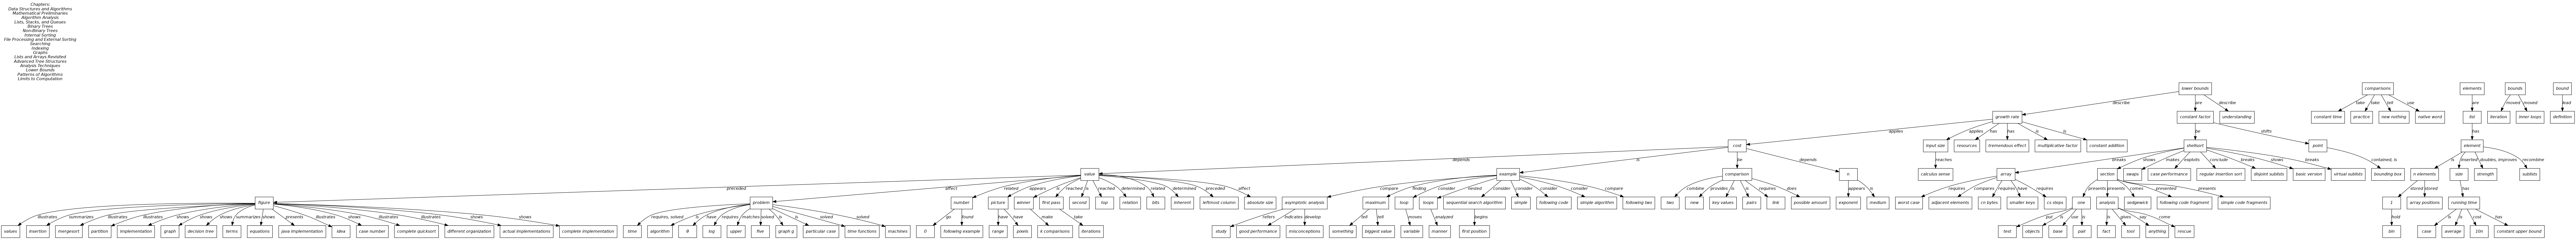

In [3]:
ontology_hierarchy, relations, titles = construct_topic_modeling_concept_hierarchy(
    chapters = chapter_texts,
    titles = chapter_titles,
    sentences_per_chapter = sentences_list,
    num_topics = 8,
    chosen_cluster = 2
)

draw_hierarchy_tree_from_ontology(
    ontological_hierarchy = ontology_hierarchy,
    relations_to_verbs = relations,
    topic_modelling_chapters = chapter_titles
)